#Linear Regression: 임금 회귀분석

##라이브러리 및 데이터 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/2023-1 과제/[0131][HW]_LinearRegression_and_SVM/econ.csv')
data = data[data['income'] > 0]
data

,gender,education,firmsize,worktype,workstart,age,union,incometype,income
183,1,0,1,1,202205,63,1,4,200
184,1,0,1,2,201201,73,1,4,100
185,1,0,1,2,201307,57,1,2,200
186,1,0,1,2,201612,79,1,4,180
187,1,0,1,2,201706,77,1,1,27
...,...,...,...,...,...,...,...,...,...
57379,2,7,6,1,202202,44,3,3,320
57380,2,7,6,1,202203,55,1,1,105
57381,2,7,6,2,201509,33,2,1,167
57382,2,7,6,2,201809,35,3,1,120


##전처리

In [ ]:
#성별

data['gender'] = (data['gender']==1)

In [ ]:
#정규직 여부

data['regular'] = (data['worktype'] == 1)

In [ ]:
#노조 보호 여부

data['union'] = (data['union'] == 2) | (data['union'] == 3)

In [ ]:
#경력

data['workstart'] = data['workstart'].astype('str')
data['workstart'] = [x[:4] for x in data['workstart']]
data['workstart'] = data['workstart'].astype('int')
data['exp'] = 2022 - data['workstart']
data = data.drop(columns = 'workstart')  

In [ ]:
data = data[['gender',	'education',	'firmsize',	'regular',	'exp',	'age',	'union',	'income']]
data

,gender,education,firmsize,regular,exp,age,union,income
183,True,0,1,True,0,63,False,200
184,True,0,1,False,10,73,False,100
185,True,0,1,False,9,57,False,200
186,True,0,1,False,6,79,False,180
187,True,0,1,False,5,77,False,27
...,...,...,...,...,...,...,...,...
57379,False,7,6,True,0,44,True,320
57380,False,7,6,True,0,55,False,105
57381,False,7,6,False,7,33,True,167
57382,False,7,6,False,4,35,True,120


In [ ]:
data = data.astype('int')

##기술분석을 통한 독립변수 추리기


In [ ]:
data.corr()

,gender,education,firmsize,regular,exp,age,union,income
gender,1.000000,0.146509,0.127893,0.121679,0.148838,-0.022108,0.041276,0.339455
education,0.146509,1.000000,0.298782,0.349818,0.198338,-0.512357,0.183663,0.415458
firmsize,0.127893,0.298782,1.000000,0.381864,0.318088,-0.176567,0.324769,0.427575
regular,0.121679,0.349818,0.381864,1.000000,0.366791,-0.254407,0.105532,0.459724
exp,0.148838,0.198338,0.318088,0.366791,1.000000,0.111148,0.163818,0.512366
age,-0.022108,-0.512357,-0.176567,-0.254407,0.111148,1.000000,-0.060278,-0.144177
union,0.041276,0.183663,0.324769,0.105532,0.163818,-0.060278,1.000000,0.200468
income,0.339455,0.415458,0.427575,0.459724,0.512366,-0.144177,0.200468,1.000000


##데이터셋 분리

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


In [ ]:
#OLS 선형회귀를 통해 1차적으로 독립변수들의 영향력을 검정
#train set에 대해서만 실시
#결과적으로 의미없는 변수들은 없다고 나옴

import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_constant = sm.add_constant(train_X, has_constant='add') # has_constant='add'; 상수항 추가
lin_model_constant = sm.OLS(train_y, X_constant) # OLS기법 적용
lin_model_constant = lin_model_constant.fit() # 모델 학습
lin_model_constant.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2692.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:18:10   Log-Likelihood:            -1.2733e+05
No. Observations:               20276   AIC:                         2.547e+05
Df Residuals:                   20268   BIC:                         2.547e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.5441      6.041     -4.229      0.000     -37.385     -13.704
gender        79.1208      1.856     42.634      0.000      75.483      82.758
education     27.2005      0.837     32.505      0.000      25.560      28.841
firmsize      17.1163      0.661     25.911      0.000      15.822      18.411
regular       74.1024      2.342     31.635      0.000      69.511      78.694
exp            6.9443      0.129     53.693      0.000       6.691       7.198
age            0.0903      0.075      1.203      0.229      -0.057       0.237
union         18.1962      2.735      6.654      0.000      12.836      23.557
==============================================================================
Omnibus:                    16476.682   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1519179.876
Skew:                           3.333   Prob(JB):                         0.00
Kurtosis:                      44.878   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##다중선형회귀 및 성능평가

In [ ]:
# 회귀(y값이 연속형변수)의 평가지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    # MSE는 제곱이기에 값이 큼으로 r-MSE(root)를 이용한다.
    # MSE는 scikit-learn의 mean_squared_error()로 계산
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    # MAE는 scikit-learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)

    # (r-MSE & MAE)를 출력 후, 반환해주는 함수
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

RMSE: 135.657, MAE: 87.108


<BarContainer object of 2 artists>

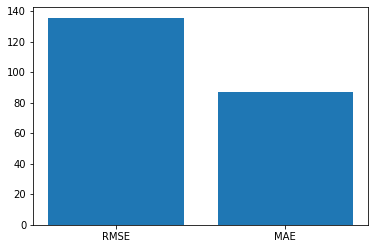

In [ ]:
#규제항과 스케일링 없이 실시

from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

##규제항을 포함한 다중회귀분석

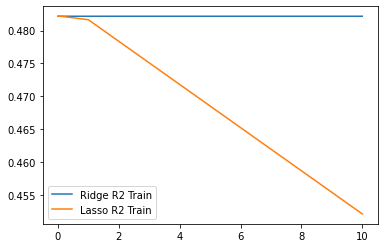

In [ ]:
# 모델 검증에 사용되는 라이브러리
from sklearn.model_selection import cross_val_score

# 규제항이 있는 선형회귀 관련 라이브러리
from sklearn.linear_model import Ridge, Lasso

# hyper-parameter 후보
alpha_list = [0.001, 0.01, 0.1, 1, 10]

# 모델 평가와 관련된 라이브러리
from sklearn import metrics
from sklearn.metrics import r2_score # R^2

# 각 모델을 비교하기 위한 평가지표인 r2-score를 저장할 장소
ridge_r2_list_train = []
ridge_r2_list_test = []
lasso_r2_list_train = []
lasso_r2_list_test = []

import warnings
warnings.filterwarnings('ignore')

# 모든 'hyper-parameter'에 대해 하나씩 수행
for alpha in alpha_list:

    # 모델 객체 선언; Ridge(), Lasso()
    # alpha <- hyper-parameter 하나씩 대입
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)

    # kfold 통해 성능평가; 즉, train_set을 8:2로 나누는 것을 10번 반복해서 학습을 진행하는 것이다.
    # cross_val_score()에서 scoring='r2'로 두고 평가
    # 즉, train_set만을 가지고 학습 및 평가(검증)를 진행한다.
    # test_set은 사용하지 않는다.
    ridge_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X,train_y,scoring='r2',cv=10)))
    lasso_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X,train_y,scoring='r2',cv=10)))

plt.plot(alpha_list, ridge_r2_list_train, label='Ridge R2 Train')
plt.plot(alpha_list, lasso_r2_list_train, label='Lasso R2 Train')

plt.legend()

# r2지표는 높을수록 좋음으로, Ridge&Lasso 모두 alpha=0.001일 때 가장 모델의 성능이 좋다.

In [ ]:
# 각각 alpha = 0.001, 0.001으로 두고, ridge와 lasso 적합

# 모델 객체 선언, 이 때 위에서 구한 최적의 hyper-parameter를 넣어준다.
ridge = Ridge(alpha=0.001) # 'fit_intercept=True' : 절편을 넣어줄지에 대한 여부
lasso = Lasso(alpha=0.001)

# 모델 학습; 이번에는 학습데이터를 학습&검증데이터로 나누는 것이 아닌
# 학습데이터로 학습하고, 테스트데이터로 테스트를 한다.
ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

print("R square score for Ridge model : {:.5f}".format(r2_score(test_y, ridge.predict(test_X))))
print("R square score for Lasso model : {:.5f}".format(r2_score(test_y, lasso.predict(test_X))))

# RMSE; mean_squared_error
print("RMSE for Ridge model : {:.5f}".format(np.sqrt(mean_squared_error(test_y, ridge.predict(test_X)))))
print("RMSE for Lasso model : {:.5f}".format(np.sqrt(mean_squared_error(test_y, lasso.predict(test_X)))))

R square score for Ridge model : 0.46863
R square score for Lasso model : 0.46863
RMSE for Ridge model : 135.65678
RMSE for Lasso model : 135.65667


RMSE: 135.657, MAE: 87.108


<BarContainer object of 2 artists>

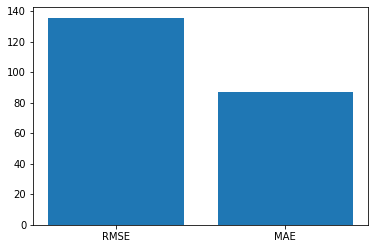

In [ ]:
pred = ridge.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

RMSE: 135.657, MAE: 87.108


<BarContainer object of 2 artists>

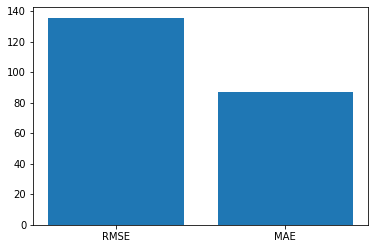

In [ ]:
pred = lasso.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

규제항을 포함했으나 큰 차이가 없음 <br>
왜냐면 모든 변수들이 다 유의미하기 때문

##변수 중요도 해석

###원 단위

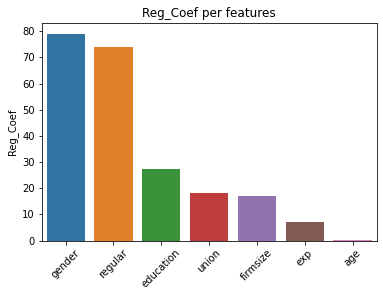

In [ ]:
# 원 회귀계수의 절댓값
coef = lr_model.coef_
coef_abs = np.abs(coef)

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = X.head(1).columns[idx].values

# top10
sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features')
plt.show()

###minmax 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_data = data.drop(columns = ['gender', 'regular', 'union'])
remaining_data = data[['gender', 'regular', 'union']]

scaler = MinMaxScaler()
scaler.fit(scale_data)
trans_data = scaler.transform(scale_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=scale_data.columns)
trans_data_df = pd.concat([trans_data_df.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
trans_data_df # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,education,firmsize,exp,age,income,gender,regular,union
0,0.0,0.0,0.000000,0.602564,0.056334,1,1,0
1,0.0,0.0,0.196078,0.730769,0.027738,1,0,0
2,0.0,0.0,0.176471,0.525641,0.056334,1,0,0
3,0.0,0.0,0.117647,0.807692,0.050615,1,0,0
4,0.0,0.0,0.098039,0.782051,0.006863,1,0,0
...,...,...,...,...,...,...,...,...
25341,1.0,1.0,0.000000,0.358974,0.090649,0,1,1
25342,1.0,1.0,0.000000,0.500000,0.029168,0,1,0
25343,1.0,1.0,0.137255,0.217949,0.046897,0,0,1
25344,1.0,1.0,0.078431,0.243590,0.033457,0,0,1


In [ ]:
X = trans_data_df.drop(columns = 'income')
y = trans_data_df['income']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


RMSE: 0.039, MAE: 0.025


<BarContainer object of 2 artists>

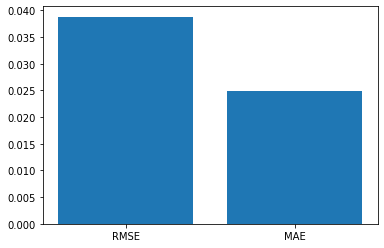

In [ ]:
#규제항과 스케일링 없이 실시

from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

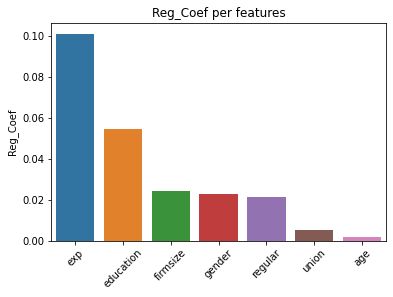

In [ ]:
# 원 회귀계수의 절댓값
coef = lr_model.coef_
coef_abs = np.abs(coef)

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = X.head(1).columns[idx].values

# top10
sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features')
plt.show()

###standard 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_data = data.drop(columns = ['gender', 'regular', 'union'])
remaining_data = data[['gender', 'regular', 'union']]

scaler = StandardScaler()
scaler.fit(scale_data)
trans_data = scaler.transform(scale_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=scale_data.columns)
trans_data_df = pd.concat([trans_data_df.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
trans_data_df # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,education,firmsize,exp,age,income,gender,regular,union
0,-2.779516,-1.367150,-0.743113,1.050736,-0.416671,1,1,0
1,-2.779516,-1.367150,0.480174,1.725746,-0.969975,1,0,0
2,-2.779516,-1.367150,0.357845,0.645731,-0.416671,1,0,0
3,-2.779516,-1.367150,-0.009141,2.130751,-0.527332,1,0,0
4,-2.779516,-1.367150,-0.131470,1.995750,-1.373888,1,0,0
...,...,...,...,...,...,...,...,...
25341,2.340794,1.741972,-0.743113,-0.231782,0.247295,0,1,1
25342,2.340794,1.741972,-0.743113,0.510729,-0.942310,0,1,0
25343,2.340794,1.741972,0.113188,-0.974292,-0.599261,0,0,1
25344,2.340794,1.741972,-0.253799,-0.839290,-0.859315,0,0,1


In [ ]:
X = trans_data_df.drop(columns = 'income')
y = trans_data_df['income']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


RMSE: 0.751, MAE: 0.482


<BarContainer object of 2 artists>

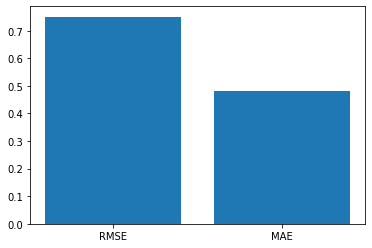

In [ ]:
#규제항과 스케일링 없이 실시

from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

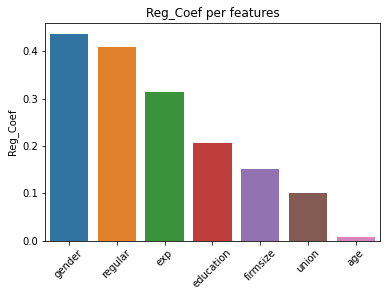

In [ ]:
# 원 회귀계수의 절댓값
coef = lr_model.coef_
coef_abs = np.abs(coef)

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = X.head(1).columns[idx].values

# top10
sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features')
plt.show()